In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
zip_path = '/content/drive/My Drive/Colab Notebooks/archive.zip'

In [42]:
import zipfile
import os

zip_path = '/content/drive/My Drive/Colab Notebooks/archive.zip'
extract_path = '/content/natural_images'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [43]:
for root, dirs, files in os.walk(extract_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Number of files: {len(files)}")

Root: /content/natural_images
Directories: ['natural_images', 'data']
Number of files: 0
Root: /content/natural_images/natural_images
Directories: ['flower', 'person', 'cat', 'car', 'fruit', 'dog', 'motorbike', 'airplane']
Number of files: 0
Root: /content/natural_images/natural_images/flower
Directories: []
Number of files: 843
Root: /content/natural_images/natural_images/person
Directories: []
Number of files: 986
Root: /content/natural_images/natural_images/cat
Directories: []
Number of files: 885
Root: /content/natural_images/natural_images/car
Directories: []
Number of files: 968
Root: /content/natural_images/natural_images/fruit
Directories: []
Number of files: 1000
Root: /content/natural_images/natural_images/dog
Directories: []
Number of files: 702
Root: /content/natural_images/natural_images/motorbike
Directories: []
Number of files: 788
Root: /content/natural_images/natural_images/airplane
Directories: []
Number of files: 727
Root: /content/natural_images/data
Directories: ['

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # Reserve 20%
)
train_generator = train_datagen.flow_from_directory(
    '/content/natural_images/data/natural_images',  # Correct path to the folder containing class directories
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    '/content/natural_images/data/natural_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 6899 images belonging to 8 classes.
Found 6899 images belonging to 8 classes.


In [46]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", input_shape=[128, 128, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=8, activation="softmax")
])

In [47]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,861,704 (64.32 MB)

 Trainable params: 16,861,704 (64.32 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.5791 - loss: 1.5261 - val_accuracy: 0.8907 - val_loss: 0.2996
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9063 - loss: 0.2557 - val_accuracy: 0.8922 - val_loss: 0.2733
Epoch 3/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9107 - loss: 0.2497 - val_accuracy: 0.9736 - val_loss: 0.0979
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9718 - loss: 0.0853 - val_accuracy: 0.9758 - val_loss: 0.0873
Epoch 5/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9873 - loss: 0.0484 - val_accuracy: 0.9897 - val_loss: 0.0385
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.9892 - loss: 0.0293 - val_accuracy: 0.9788 - val_loss: 0.0661
Epoch 7/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.9787 - loss: 0.0701 - val_accuracy: 0.9414 - val_loss: 0.1813
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9872 - loss: 0.0406 

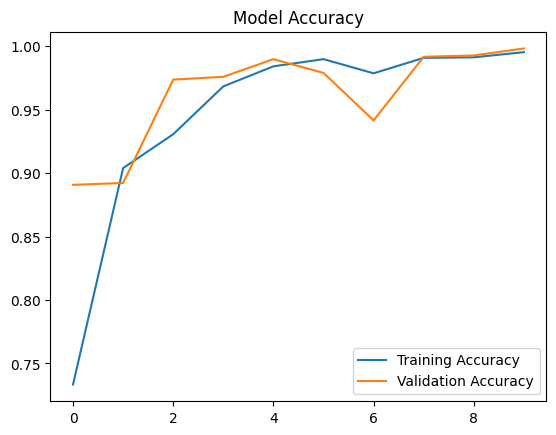

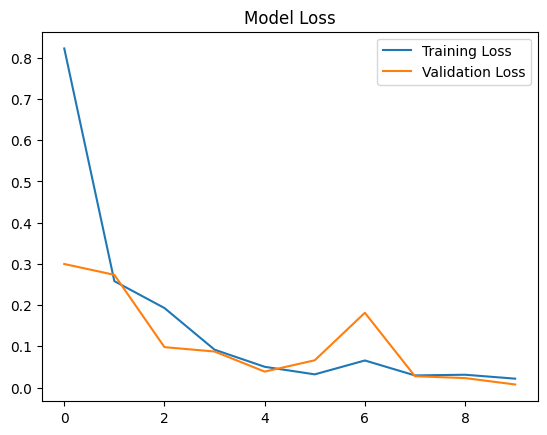

In [50]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [51]:
val_loss, val_accuracy = cnn.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")


216/216 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9987 - loss: 0.0060
Validation Accuracy: 1.00


In [52]:
predictions = cnn.predict(val_generator)
print(predictions[:5])  # Display predictions for first 5 images


216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step
[[4.8393207e-07 1.1876752e-07 3.6120532e-06 9.9469215e-01 5.3008897e-03
  6.3929861e-11 2.3294449e-08 2.7167691e-06]
 [8.8454087e-20 1.5948835e-15 9.7585963e-15 1.3622885e-15 3.0965562e-12
  1.5422947e-19 1.2271924e-19 1.0000000e+00]
 [2.4463854e-13 1.2094457e-05 1.1421463e-07 2.6124507e-14 9.9998772e-01
  1.7508906e-26 5.5121577e-11 2.4919506e-08]
 [6.0610409e-07 3.6569797e-12 7.9325360e-04 9.9849379e-01 7.1165810e-04
  1.1853100e-13 2.9022618e-07 3.7600961e-07]
 [9.9999940e-01 1.3740629e-10 1.0583215e-07 3.4264514e-07 8.4632376e-08
  4.0825318e-10 5.2330213e-11 8.3860191e-10]]


In [60]:
print(train_generator.class_indices)

{'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


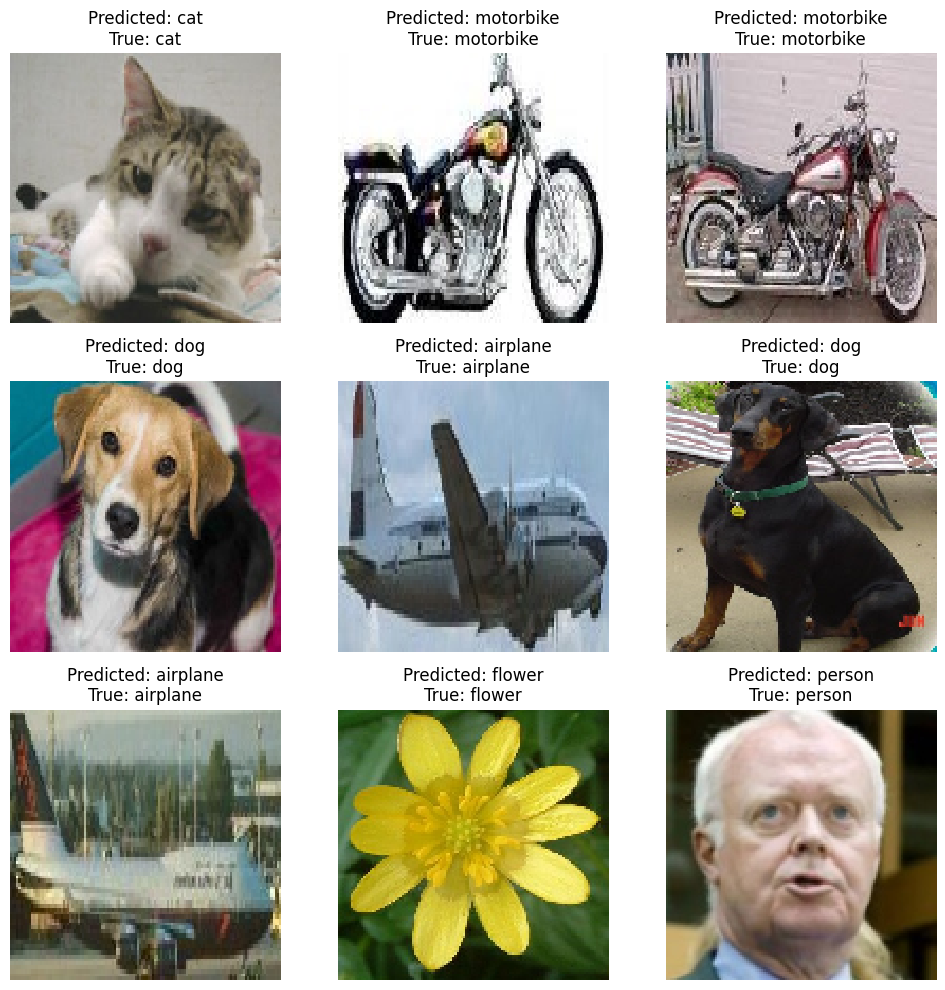

In [62]:
import matplotlib.pyplot as plt
import numpy as np

X_new, y_new = next(val_generator)  # Get a batch of validation images and labels

predictions = cnn.predict(X_new)
predicted_classes = np.argmax(predictions, axis=1)

# Class names
class_names = list(train_generator.class_indices.keys())


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_new[i], interpolation="nearest")
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nTrue: {class_names[np.argmax(y_new[i])]}")
    plt.axis("off")
plt.tight_layout()
plt.show()